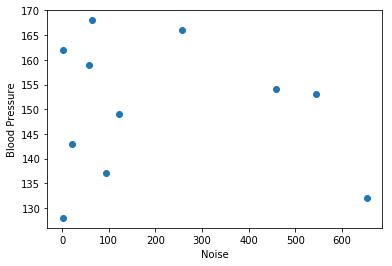

In [2]:
# data is from:
# http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/mlr02.html

# The data (X1, X2, X3) are for each patient.
# X1 = systolic blood pressure //this is the data we want to predict
# X2 = age in years
# X3 = weight in pounds
# X4 = random noise that I've added

#from builtins import range
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_excel('linear_regression_class/mlr02_noise.xls')
X = df.as_matrix()


plt.scatter(X[:,3], X[:,0])
plt.xlabel('Noise')
plt.ylabel('Blood Pressure')
plt.show()


In [3]:
df['ones'] = 1
Y = df['X1']
X = df[['X2', 'X3', 'Noise', 'ones']]
X2only = df[['X2', 'ones']]
X3only = df[['X3', 'ones']]
X23only = df[['X2', 'X3', 'ones']]
NoiseOnly = df[['Noise', 'ones']]

def get_r2(X,Y) : 
    w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
    Yhat = X.dot(w)
    d1 = Y - Yhat
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    return r2

print('r2 for X2 only: ',get_r2(X2only,Y))
print('r2 for X3 only: ',get_r2(X3only,Y))
print('r2 for Noise only: ',get_r2(NoiseOnly,Y))
print('r2 for both w/o noise:', get_r2(X23only, Y))
print('r2 for all:', get_r2(X, Y))

r2 for X2 only:  0.957840720815
r2 for X3 only:  0.941995208529
r2 for Noise only:  0.0168937886963
r2 for both w/o noise: 0.97684710415
r2 for all: 0.976945807714
